In [1]:

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as sig

os.chdir(os.path.dirname(os.getcwd()))
import spatial_metrics.helper_functions as hf
import spatial_metrics.cell_model_base as cs_model
import spatial_metrics.detect_peaks as dp
import spatial_metrics.spatial_metrics_spikes_base as pl_spk
import spatial_metrics.spatial_prediction_spikes_base as sp_spk


In [3]:
num_of_fields = 2
# Define field parameters
field1_center = (20, 35)
field2_center = (10, 5)
field3_center = (5, 30)
field1_size = 4
field2_size = 2
field3_size = 2

sampling_rate = 30. # points/frames per second
duration = 500 # in seconds
rate = 10 # how much your neuron should spike
environment_edges = [[0,30],[0,50]] # in cm [[x_min,x_max],[y_min,y_max]]

x_coordinates,y_coordinates,speed,time_vector = cs_model.generate_random_walk(input_srate = sampling_rate,input_total_Time = duration,heading_srate = 10., speed_srate = 5., rho1  = 1,sigma = 0.02,mu_e  = 0.,smooth_coeff = 0.5,environment_edges = environment_edges)
total_points = time_vector.shape[0]

spike_times = cs_model.generate_poisson_spikes(rate, duration)
spike_times_idx = (spike_times*sampling_rate).astype(int)

modulated_spike_times_idx = []
for counter in range(num_of_fields):
    field_center = eval('field' + str(counter+1) + '_center')
    field_size = eval('field' + str(counter+1) + '_size')
    modulated_spike_times_idx_aux = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,spike_times_idx,x_center = field_center[0],y_center = field_center[1], s = field_size)

    modulated_spike_times_idx.append(modulated_spike_times_idx_aux)
modulated_spike_times_idx = np.unique(np.concatenate(modulated_spike_times_idx))


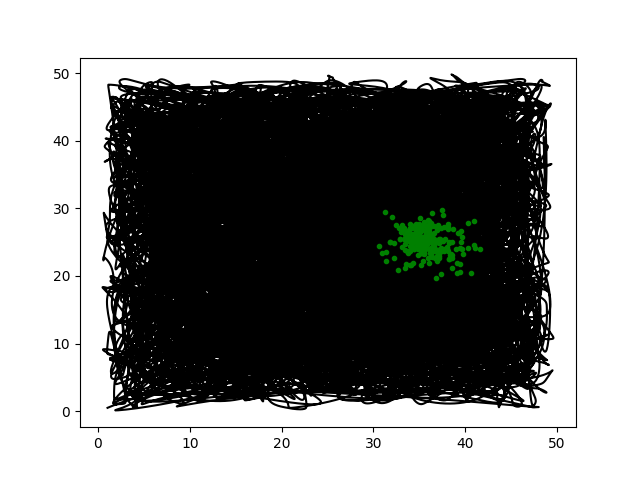

In [58]:

srate = 100. # points/frames per second
total_Time = 1000 # in seconds
_lambda = 20 # how much your neuron should spike
environment_edges = [[0,50],[0,50]] # in cm [[x1,x2],[y1,y2]]

x_coordinates,y_coordinates,speed,xy_timevector = cs_model.generate_random_walk(input_srate = srate,input_total_Time = total_Time,heading_srate = 10., speed_srate = 5., rho1  = 1,sigma = 0.02,mu_e  = 0.,smooth_coeff = 0.5,environment_edges = environment_edges)
total_points = xy_timevector.shape[0]

timestamps = cs_model.generate_arrivals(_lambda,total_Time)
I_timestamps = (timestamps*srate).astype(int)

# place cell with one field: x_center and y_center is the location of the place field in ehe environment; s is the field variance
I_timestamps1 = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,I_timestamps,x_center = 35,y_center = 25, s = 2)
I_timestamps2 = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,I_timestamps,x_center = 15,y_center = 40, s = 5)

I_timestamps = []
I_timestamps.append(I_timestamps1)
# I_timestamps.append(I_timestamps2)

I_timestamps[0].shape

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
for neuron in range(len(I_timestamps)):
    plt.plot(x_coordinates[I_timestamps[neuron]],y_coordinates[I_timestamps[neuron]],'g.')
plt.show()


In [65]:

input_dict = dict()
input_dict['saving_string'] = 'SpatialMetrics'
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['mean_video_srate'] = srate
input_dict['min_time_spent'] = 0
input_dict['min_visits'] = 0
input_dict['min_speed_threshold'] = 0
input_dict['x_bin_size'] = 2 # y bin size in cm
input_dict['y_bin_size'] = 2 # y bin size in cm
input_dict['environment_edges'] = environment_edges # in cm
input_dict['shift_time'] = 200
input_dict['num_cores'] = 50
input_dict['num_surrogates'] = 200
input_dict['saving_path'] = None
input_dict['saving'] = False
input_dict['smoothing_size'] = 2
input_dict['num_of_folds'] = 10
input_dict['non_overlap'] = 0.1
input_dict['window_length'] = 0.1

spatial_prediction_object = sp_spk.SpatialPrediction(**input_dict)
spatial_prediction_output = spatial_prediction_object.main(I_timestamps,xy_timevector,x_coordinates,y_coordinates)


File not saved!


In [64]:

input_dict = dict()
input_dict['saving_string'] = 'SpatialMetrics'
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['mean_video_srate'] = srate
input_dict['min_time_spent'] = 0
input_dict['min_visits'] = 0
input_dict['min_speed_threshold'] = 0
input_dict['x_bin_size'] = 2 # y bin size in cm
input_dict['y_bin_size'] = 2 # y bin size in cm
input_dict['environment_edges'] = environment_edges # in cm
input_dict['shift_time'] = 200
input_dict['num_cores'] = 50
input_dict['num_surrogates'] = 200
input_dict['saving_path'] = None
input_dict['saving'] = False
input_dict['smoothing_size'] = 2
input_dict['num_of_folds'] = 10
input_dict['non_overlap'] = 0.1
input_dict['window_length'] = 0.1

spatial_prediction_object = sp_spk.SpatialPredictionSurrogates(**input_dict)
spatial_prediction_output_shuffled = spatial_prediction_object.main(I_timestamps,xy_timevector,x_coordinates,y_coordinates)


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    5.4s


File not saved!


[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:   10.3s finished


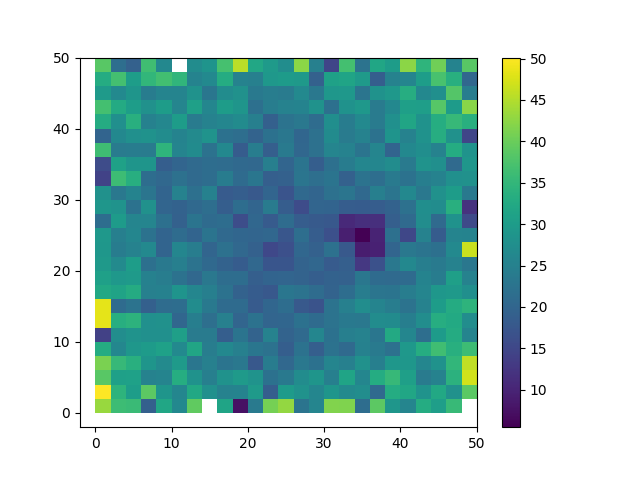

In [66]:
neuron = 0

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
# plt.plot(spatial_prediction_output['events_x_localization'][neuron],spatial_prediction_output['events_y_localization'][neuron],'r.')
plt.colorbar()
plt.show()


In [33]:
num_surrogates = spatial_prediction_output['input_parameters']['num_surrogates']
num_surrogates

200

In [67]:
spatial_prediction_output_shuffled.keys()

concat_mean_error_surr = []
for surr in range(num_surrogates):
    concat_mean_error_surr.append(np.nanmean(spatial_prediction_output_shuffled['concat_mean_error'][surr]))
concat_mean_error_surr = np.array(concat_mean_error_surr)


In [68]:

mean_error_surr = []
for surr in range(num_surrogates):
    mean_error_aux = np.nanmean(spatial_prediction_output_shuffled['concat_mean_error'][surr])
    mean_error_surr.append(mean_error_aux)
mean_error_surr = np.array(mean_error_surr)

mean_error = np.nanmean(spatial_prediction_output['concat_mean_error'])

p_val = np.nansum(mean_error_surr < mean_error)/num_surrogates

mean_error_zscored = (mean_error - np.nanmean(mean_error_surr))/np.nanstd(mean_error_surr)
mean_error_demean = mean_error - np.nanmean(mean_error_surr)


In [85]:
# simulation to get the mean error from 2 random points in the enviroment
all_dist = []
for _ in range(1000):
    x1_points = np.random.choice(np.arange(float(environment_edges[0][0]),float(environment_edges[0][1]),0.1),100)
    y1_points = np.random.choice(np.arange(float(environment_edges[1][0]),float(environment_edges[1][1]),0.1),100)

    x2_points = np.random.choice(np.arange(float(environment_edges[0][0]),float(environment_edges[0][1]),0.1),100)
    y2_points = np.random.choice(np.arange(float(environment_edges[1][0]),float(environment_edges[1][1]),0.1),100)

    dist = np.sqrt((x1_points - x2_points)**2 + (y1_points-y2_points)**2)[0]
    all_dist.append(dist)
np.nanmean(all_dist)


26.044821312092726

In [83]:
all_dist = []
for _ in range(1000):
    rand_pt1 = np.random.choice(range(x_coordinates.shape[0]),1)
    rand_pt2 = np.random.choice(range(y_coordinates.shape[0]),1)

    dist = np.sqrt((x_coordinates[rand_pt1] - x_coordinates[rand_pt2])**2 + (y_coordinates[rand_pt1]-y_coordinates[rand_pt2])**2)[0]
    all_dist.append(dist)
np.nanmean(all_dist)


24.25450217032182

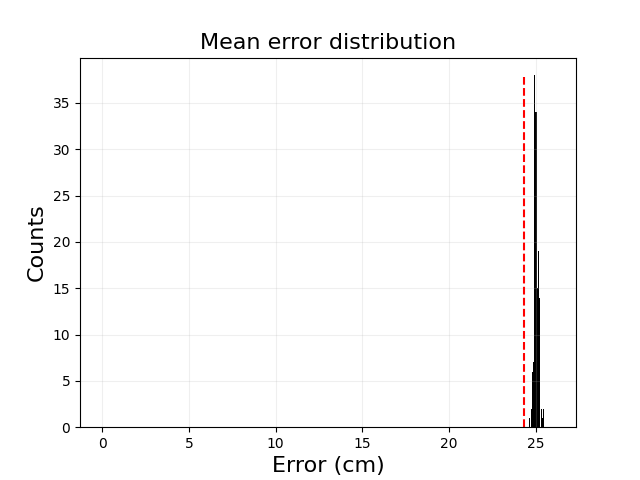

In [84]:
mean_error = np.nanmean(spatial_prediction_output['concat_mean_error'])
mean_error_surr = np.nanmean(np.array(spatial_prediction_output_shuffled['concat_mean_error']),1)

error_step = 0.05
error_bins = np.arange(0,np.ceil(np.nanmax(mean_error_surr))+error_step/2,error_step)
error_counts,bins = np.histogram(mean_error_surr,error_bins)
center_error_bins = error_bins[0:-1] + np.diff(error_bins)

plt.figure()
plt.bar(center_error_bins,error_counts,width=error_step,color='black')
plt.plot([mean_error,mean_error],[0,np.nanmax(error_counts)],'r--')
plt.ylabel('Counts',fontsize=16)
plt.xlabel('Error (cm)',fontsize=16)
plt.title('Mean error distribution',fontsize=16)
plt.grid(alpha=0.2)
plt.show()


In [40]:
spatial_prediction_output_shuffled['concat_continuous_error'][0]

array([28.84085738, 38.62127608, 22.71063295, ..., 47.74421317,
       38.66672314, 44.91512254])

In [49]:
spatial_prediction_output['events_x_localization'][surr]

array([36.40543851, 36.30467071, 37.63782227, ..., 31.23662375,
       35.72942313, 42.26216488])

array([ 0.7027573 ,  0.81089713,  2.17618101, ...,  7.01642793,
       44.47692436, 40.95080226])

In [78]:
mean_error_demean

-0.6893883763504256

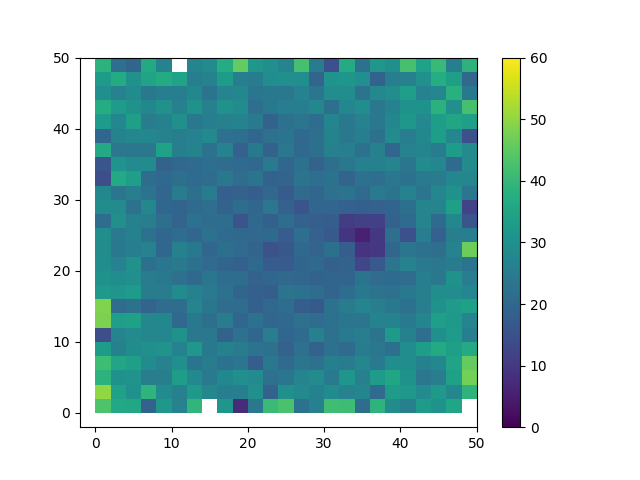

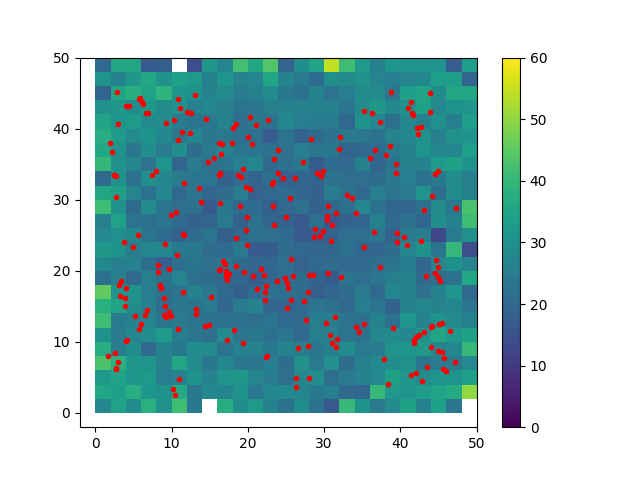

In [71]:

neuron = 0
surr = 0

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
# plt.plot(spatial_prediction_output['events_x_localization'][neuron],spatial_prediction_output['events_y_localization'][neuron],'r.')
plt.colorbar()
plt.clim([0,60])
plt.show()

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output_shuffled['spatial_error'][surr])
plt.plot(spatial_prediction_output_shuffled['events_x_localization'][surr][neuron],spatial_prediction_output_shuffled['events_y_localization'][surr][neuron],'r.')
plt.colorbar()
plt.clim([0,60])
plt.show()


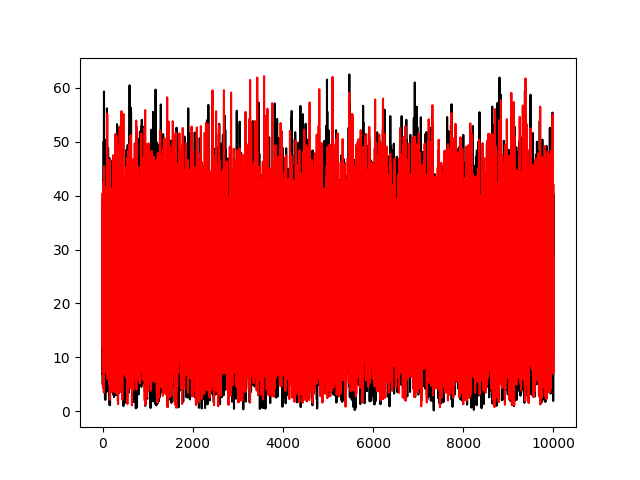

In [72]:

plt.figure()
plt.plot(spatial_prediction_output['concat_continuous_error'],'k')
plt.plot(spatial_prediction_output_shuffled['concat_continuous_error'][0],'r')
plt.show()


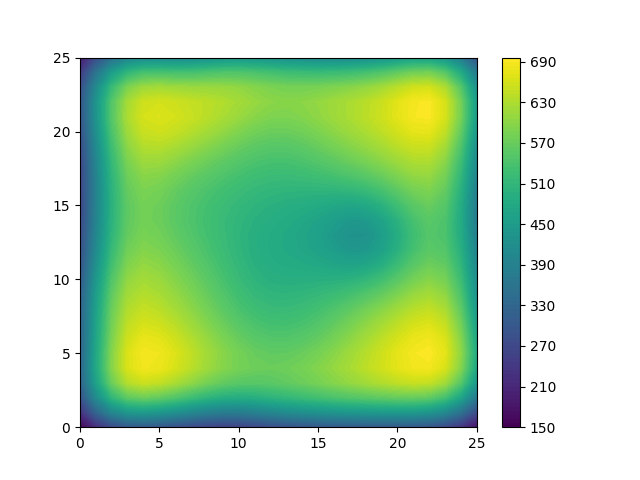

In [73]:

plt.figure()
plt.contourf(spatial_prediction_output['spatial_error_smoothed'],100)
plt.colorbar()
plt.show()


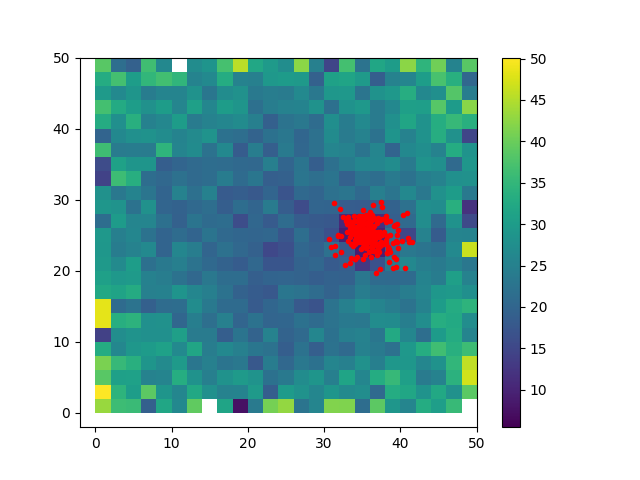

In [74]:

neuron = 0

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
plt.plot(spatial_prediction_output['events_x_localization'][neuron],spatial_prediction_output['events_y_localization'][neuron],'r.')
plt.colorbar()
plt.show()


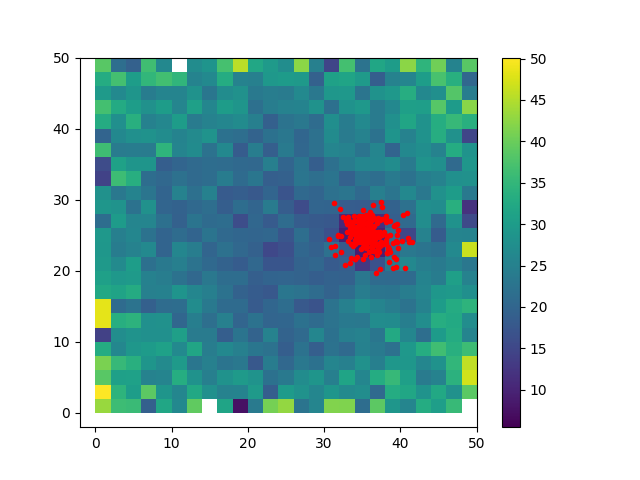

In [75]:

neuron = 0

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
plt.plot(spatial_prediction_output['events_x_localization'][neuron],spatial_prediction_output['events_y_localization'][neuron],'r.')
plt.colorbar()
plt.show()


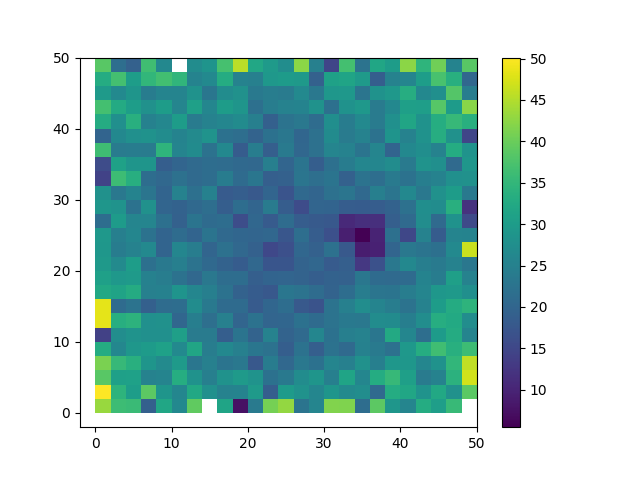

In [76]:

plt.figure()
plt.pcolormesh(spatial_prediction_output['x_center_bins'],spatial_prediction_output['y_center_bins'],spatial_prediction_output['spatial_error'])
plt.colorbar()
plt.show()


In [34]:

input_dict = dict()
input_dict['saving_string'] = 'SpatialMetrics'
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['video_srate'] = srate
input_dict['min_time_spent'] = 0.01
input_dict['min_visits'] = 5
input_dict['min_speed_threshold'] = 5
input_dict['x_bin_size'] = 1 # y bin size in cm
input_dict['y_bin_size'] = 1 # y bin size in cm
input_dict['environment_edges'] = environment_edges # in cm
input_dict['shift_time'] = 200
input_dict['num_cores'] = 20
input_dict['num_surrogates'] = 12
input_dict['saving_path'] = None
input_dict['saving'] = False
input_dict['smoothing_size'] = 2
input_dict['percentile_threshold'] = 97
input_dict['min_num_of_pixels'] = 4

place_cell = pl_spk.PlaceCell(**input_dict)
place_cell_output = place_cell.main(I_timestamps[0],xy_timevector,x_coordinates,y_coordinates)



[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.


File not saved


[Parallel(n_jobs=20)]: Done  12 out of  12 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  12 out of  12 | elapsed:    4.0s finished
/projects/ag-korotkova/v1/korotkova_group/matlab_scripts/Rob/CalciumImaging/scripts/spatial_project/spatial_metrics/spatial_metrics_spikes_base.py:282: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(results)


In [8]:
# np.array([0,1,2,3,4,5,6,7,8,9,10])

# 0,1,2
#   1,2,3
#     2,3,4
#       3,4,5
#         4,5,6
#           5,6,7
#             6,7,8
#               7,8,9
#                 8,9,10
                
# (11-3)/1 + 1   

# 0,1,2
#     2,3,4
#         4,5,6
#             6,7,8
#                 8,9,10
# (11-3)/2 + 1

# 0,1,2
#       3,4,5
#             6,7,8 
#                   9,10
# 11-3                

In [9]:
# import inspect
# lines = inspect.getsource(place_cell.parallelize_surrogate)
# print(lines)

In [10]:

# plt.figure()
# plt.plot(x_coordinates,y_coordinates,'k',zorder = 1,alpha=0.8)
# plt.scatter(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],c='red',s = 15,zorder = 10,alpha=0.2)
# plt.title('Trajectory with spikes',fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()


In [11]:

# mean_place_field_shuffled = np.nanmean(place_cell_output['place_field_smoothed_shuffled'],0)
# std_place_field_shuffled = np.nanstd(place_cell_output['place_field_smoothed_shuffled'],0)
# place_field_smoothed = place_cell_output['place_field_smoothed'].copy()
# place_field_smoothed_zscored = (place_field_smoothed - mean_place_field_shuffled)/std_place_field_shuffled


# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_field_smoothed_zscored)
# plt.colorbar()
# plt.title('Smoothed Place Field with calcium peaks',fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()




In [12]:

# print(place_cell_output['place_cell_extension_absolute'])
# print(place_cell_output['place_cell_extension_relative'])


In [13]:

# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'])
# plt.colorbar()
# plt.plot(place_cell_output['islands_x_max'],place_cell_output['islands_y_max'],'r.',markersize=20)
# plt.title('Num Islands = {0}'.format(place_cell_output['num_of_islands']) ,fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()


In [14]:

# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'])
# plt.colorbar()
# plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],'r.',alpha=0.1)
# plt.title('Smoothed Place Field' ,fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()


In [15]:

# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['spike_rate_occupancy'])
# plt.colorbar()
# plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],'r.',alpha=0.1)
# plt.title('Spike Occupancy',fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()


In [16]:

# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['visits_map'])
# plt.colorbar()
# plt.title('Visits map',fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()



In [17]:

# plt.figure()
# plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['occupancy_map'])
# plt.colorbar()
# plt.title('Occupancy map',fontsize=16)
# plt.xlabel('x coordinates',fontsize=14)
# plt.ylabel('y coordinates',fontsize=14)
# plt.xlim([environment_edges[0][0],environment_edges[0][1]])
# plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.tight_layout()
# plt.show()



In [18]:
# # p value is defined as the amount of shuffled mutual information values above the original one 
# p_value = np.sum(place_cell_output['I_spk_permutation'] >= place_cell_output['I_spk'])/place_cell_output['I_spk_permutation'].shape[0]

# if p_value == 0:
#     p_value = 1/place_cell_output['I_spk_permutation'].shape[0]
# p_value

# counts,bins = np.histogram(place_cell_output['I_spk_permutation'],20)
# bins_centers = bins[0:-1] + np.diff(bins)
# bin_width = np.diff(bins_centers)[0]

# plt.figure()
# plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
# plt.plot([place_cell_output['I_spk'],place_cell_output['I_spk']],[0,np.max(counts)],'r--',linewidth=6)
# plt.title("Bits per spike zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_spk_zscored'],p_value),fontsize=16)
# plt.xlabel('Bits per spike',fontsize=14)
# plt.ylabel('Counts',fontsize=14)
# plt.tight_layout()
# plt.show()


In [19]:
# # p value is defined as the amount of shuffled mutual information values above the original one 
# p_value = np.sum(place_cell_output['I_sec_permutation'] >= place_cell_output['I_sec'])/place_cell_output['I_sec_permutation'].shape[0]

# if p_value == 0:
#     p_value = 1/place_cell_output['I_sec_permutation'].shape[0]
# p_value

# counts,bins = np.histogram(place_cell_output['I_sec_permutation'],20)
# bins_centers = bins[0:-1] + np.diff(bins)
# bin_width = np.diff(bins_centers)[0]

# plt.figure()
# plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
# plt.plot([place_cell_output['I_sec'],place_cell_output['I_sec']],[0,np.max(counts)],'r--',linewidth=6)
# plt.title("Bits per second zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_sec_zscored'],p_value),fontsize=16)
# plt.xlabel('Bits per second',fontsize=14)
# plt.ylabel('Counts',fontsize=14)
# plt.tight_layout()
# plt.show()
